In [1]:
import os
from PIL import Image
import numpy as np

import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt 

In [2]:
query_img_path = "/disk3/eric/dataset/VISION_SOFS/WEAPON_4/query/query_2.png"
query_img = Image.open(query_img_path)
plt.figure(figsize=(12,12))
#plt.imshow(query_img)
plt.show()

filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/query/query_2.png


<Figure size 1200x1200 with 0 Axes>

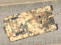

In [3]:
query_img

In [4]:
# import random

# query_img = Image.open(query_img_path)

# # 랜덤 각도 4개 선택 (-180 ~ 180 범위)
# angles = [random.randint(-180, 180) for _ in range(4)]

# # 각도별로 이미지를 회전하고 저장
# for i, angle in enumerate(angles):
#     rotated_img = query_img.rotate(angle, expand=True)  # 이미지 회전
#     rotated_img.save(f"/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/rotated_{angle}_query_{i+1}.png")  # 결과 저장

In [174]:
images = os.listdir("/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop")

os.environ["TORCH_HOME"] = "/disk3/eric/weight"
model = torchvision.models.resnet18(pretrained=True) #DEFAULT

all_names = []
all_vecs = None
model.eval()
root = "/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/"

transform = transforms.Compose([
    transforms.Resize((256 , 256)) ,
    transforms.ToTensor() ,
    transforms.Normalize(mean = [0.485 , 0.456 , 0.406] , std = [0.229 , 0.224 , 0.225])
])

activation = {}
def get_activation(name):
    def hook(model , input , output):
        activation[name] = output.detach()
    return hook

model.avgpool.register_forward_hook(get_activation("avgpool"))

with torch.no_grad():
    for i , file in enumerate(images):
            img = Image.open(os.path.join(root + file))
            print(img.size)
            img = transform(img)
            out = model(img[None , ...])
            vec = activation["avgpool"].numpy().squeeze()[None , ...]
            if all_vecs is None:
                all_vecs = vec
            else:
                all_vecs = np.vstack([all_vecs , vec])
            all_names.append(file)
    if i % 100 == 0 and i != 0:
        print(i , "done")

#------------------------------
# result save

np.save("/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_z_cos/all_vecs.npy" , all_vecs,allow_pickle=True)
np.save("/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_z_cos/all_names.npy" , all_names,allow_pickle=True)

filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_7.png
(57, 25)
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_8.png
(97, 74)
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_1.png
(54, 33)
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/query_2.png
(61, 45)
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_11.png
(115, 74)
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_10.png
(131, 45)
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_12.png
(77, 73)
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_13.png
(73, 96)
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_14.png
(122, 122)
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_6.png
(103, 81)
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_r

In [175]:
all_names

['cropped_box_7.png',
 'cropped_box_8.png',
 'cropped_box_1.png',
 'query_2.png',
 'cropped_box_11.png',
 'cropped_box_10.png',
 'cropped_box_12.png',
 'cropped_box_13.png',
 'cropped_box_14.png',
 'cropped_box_6.png',
 'cropped_box_3.png',
 'cropped_box_15.png',
 'cropped_box_0.png',
 'cropped_box_9.png',
 'cropped_box_5.png',
 'cropped_box_4.png',
 'cropped_box_2.png']

In [176]:
import streamlit as st
import numpy as np
from PIL import Image
import time
from scipy.spatial.distance import cdist

@st.cache_data
def read_data():
    all_vecs = np.load("/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_z_cos/all_vecs.npy",allow_pickle=True)
    all_names = np.load("/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_z_cos/all_names.npy",allow_pickle=True)
    return all_vecs , all_names

#---

vecs = np.load("/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_z_cos/all_vecs.npy",allow_pickle=True)
names = np.load("/disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_z_cos/all_names.npy",allow_pickle=True)
#vecs , names = read_data()

2024-11-21 23:01:14.551 No runtime found, using MemoryCacheStorageManager


In [177]:
vecs

array([[1.4684787 , 0.7785305 , 0.4211664 , ..., 2.0481308 , 0.7465032 ,
        0.01407981],
       [0.7560633 , 0.3967995 , 1.1006777 , ..., 1.0411644 , 0.13293889,
        1.0260795 ],
       [0.01670723, 0.61061347, 0.38415122, ..., 0.41705656, 0.25745428,
        0.05338608],
       ...,
       [1.7955385 , 0.9326167 , 1.1859128 , ..., 0.5888601 , 0.19890885,
        0.41200918],
       [0.43935645, 0.4067473 , 2.328033  , ..., 1.6001801 , 0.07332297,
        0.0422553 ],
       [1.0097406 , 0.02962197, 0.7348108 , ..., 1.028672  , 0.8582106 ,
        0.12438963]], dtype=float32)

In [178]:
names

array(['cropped_box_7.png', 'cropped_box_8.png', 'cropped_box_1.png',
       'query_2.png', 'cropped_box_11.png', 'cropped_box_10.png',
       'cropped_box_12.png', 'cropped_box_13.png', 'cropped_box_14.png',
       'cropped_box_6.png', 'cropped_box_3.png', 'cropped_box_15.png',
       'cropped_box_0.png', 'cropped_box_9.png', 'cropped_box_5.png',
       'cropped_box_4.png', 'cropped_box_2.png'], dtype='<U18')

In [179]:


#_ , fcol2 , _ = st.columns(3)

#scol1 , scol2 = st.columns(2)

#ch = scol1.button("Start / change")
#fs = scol2.button("find similar")

idx = 10
print("target idx : ", idx)
print("target name : ", names[idx])

#random_name = names[np.random.randint(len(names))]
#fcol2.image(Image.open( root +  random_name))
#st.session_state["disp_img"] = random_name
#st.write(st.session_state["disp_img"])

#c1 , c2 , c3 , c4 , c5 = st.columns(5)
#idx = int(np.argwhere(names == st.session_state["disp_img"]))
target_vec = vecs[idx]
#fcol2.image(Image.open("./images/" + st.session_state["disp_img"]))

top5 = cdist(target_vec[None , ...] , vecs).squeeze().argsort()[1:10]


top_imgs =[]
for i in range(9):
    img_ = Image.open(os.path.join(root, names[top5[i]]))
    top_imgs.append(img_)

target idx :  10
target name :  cropped_box_3.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_2.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_1.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_9.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_7.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_0.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/query_2.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_10.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_13.png
filename /disk3/eric/dataset/VISION_SOFS/WEAPON_4/trex_result_crop/cropped_box_6.png


In [180]:
#--- 일단 실험은 성공적이니. rotation variant 만 되면 성공 !
#--- 심지어 rotate 도 된다.
#--- rotation invariant 하게, 아키텍처 살짝 구축해주면 논문끝. 